##資料前處理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# For data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# For classification model
# 'lr', 'rf', 'lightgbm', 'gbc', 'xgboost'
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

/Users/kb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown 1yXC_IuIDyb73qpUTw5LfxYP8ag7N2Kr-

/Users/kb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yXC_IuIDyb73qpUTw5LfxYP8ag7N2Kr-
To: /Volumes/TOBY/01 | 學校-臺大健管所/04-研究/Predict Healthcare Utilization and Medical Expenditure Among Individuals Aged Population Using Machine Learning Techniques and SHARE Data_20241107/Code/Final/final_cleaned.csv
100%|██████████████████████████████████████| 26.5M/26.5M [00:00<00:00, 60.6MB/s]


In [4]:
!gdown 111qCWGjsz35fNvPPgRSQZQOuV6HGMeEi

/Users/kb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=111qCWGjsz35fNvPPgRSQZQOuV6HGMeEi
To: /Volumes/TOBY/01 | 學校-臺大健管所/04-研究/Predict Healthcare Utilization and Medical Expenditure Among Individuals Aged Population Using Machine Learning Techniques and SHARE Data_20241107/Code/Final/country_eu.csv
100%|████████████████████████████████████████| 155k/155k [00:00<00:00, 84.9MB/s]


In [5]:
data = pd.read_csv("final_cleaned.csv")
country_data = pd.read_csv("country_eu.csv")

In [6]:
country_data = country_data.rename(columns={'country': 'country_eu'})

In [7]:
data = pd.concat([country_data, data], axis=1)
data

,country_eu,mergeid,age,country,gender,edu_lv,marital,migration,citizen,religion,region,residence_type,network_size,integration,closeness,network_satisfaction,children,grandchildren,look_after_grand,home_own,mortgage,health_self,chronic,vision_d,vision_n,hearing,level_of_pain,glasses,hearing_aid,cane,walker,manual_wheelchair,eletric_wheelchair,buggy,utensils,personal_alarm,bar,raised_toilet,incontinence,heart,hypertension,cholesterol,stroke,diabetes,lung_disease,cancer,ulcer,parkinsons,cataracts,fracture,dementia,psycho,arthritis,kidney,depression,pessimism,suicidality,guilt,sleep,interest,irritability,appetite,fatigue,concentration,enjoyment,tearfulness,eurod_categ,limit_activity,limit_work,adls,iadls,mobility,uppermo,lowermo,lgmuscle,grossmo,finemo,fall,date_day,memory,imword_recall,deword_recall,serial_7,verbal,inactivity,drinking,smoking,dairy,legeggs,meat,fritsveg,outpatient,vaccination,eye_exam,mammogram,colon,dental,inpatient,other_facility,forgo_cost,forgo_available,health_literacy,medicine,polypharmacy,satisfied_insurance,supplementary_insurance,home_care,personal_care_hour,domestic_task_hour,meal_week,nursing_home,nursing_home_week,receive_help_freq,given_help_freq,activity_help,help_meet_need,income_work,income_self_work,hh_income,economic_status,income_house,long_term,bond_stock_funds,bank_account,value_house,value_business,value_car,oldage_pension,occupational_pension,disability_pension,unemployment_benefits,social_assistance,sickness_benefit,private_pensions,private_transfer,owe,given_gift_250,given_gift_5000,receive_gift_250,receive_gift_5000,rent_expenditure,hh_cosumption,unafford_food,make_ends_meet,hh_real_asset,hh_gross_asset,hh_net_asset,hh_net_worth,job,paidwork,other_job,employment,hours_work,number_social,voluntary,course,club,organization,read,games,card,social_freq,companionship,leftout,isolated,lonely,satisfied_life,casp_12,extraversion,aggreeableness,conscientiousness,neuroticism,openess,bmi,bmi_cate,overweight
0,11,AT-000787-01,58,5,0,2,1,0,1,0,0,1,7,4,4.00,10,0,0,non_applicable,1,0.0,2,0,2,1,2,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,5,5,5,27,0,2,2,1,3,5,1,3,1,0,non_applicable,1,1,0,0,0,0,5,0,0,1,1,0,0,0,0,0,0,0,1,non_applicable,non_applicable,60000.00000,25000.0,108000.00000,1,0.0,94341.5742,339774.1648,6000.0,1400000.0,406763.9454,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0.0,9600.0,0,1,1816763.976,440115.739,440115.739,2256879.715,2,non_applicable,1,2,60,2,0,1,0,0,1,0,0,2.500000,3,3,3,3,10,44,2.0,3.0,4.5,1.5,5.0,24.15,2,0
1,11,AT-001492-01,70,5,1,1,1,0,1,1,0,2,4,4,4.00,10,6,13,1,2,0.0,3,0,3,3,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,2,7,5,5,26,0,1,2,1,3,4,1,7,1,1,1,0,1,0,0,0,0,5,1,0,3,0,0,0,0,0,0,0,0,0,non_applicable,non_applicable,0.00000,0.0,27600.00000,1,0.0,28000.0000,0.0000,14000.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,10680.0,6600.0,0,0,0.000,42000.000,42000.000,42000.000,5,0,non_applicable,non_applicable,0,4,1,0,1,0,1,0,1,2.250000,3,3,3,3,8,39,5.0,3.5,3.5,4.5,3.5,21.05,2,0
2,11,AT-001492-02,71,5,0,1,1,0,1,1,0,2,4,4,3.25,9,6,13,1,non_applicable,0.0,1,1,3,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,4,3,6,6,5,22,0,1,3,1,3,2,2,5,1,1,non_applicable,0,0,0,0,0,0,5,1,1,2,0,0,0,0,0,0,0,0,0,0,non_applicable,0.00000,0.0,27600.00000,1,0.0,28000.0000,0.0000,14000.0,0.0,0.0000,0.0,32200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,10680.0,6600.0,non_applicable,0,0.000,42000.000,42000.000,42000.000,1,0,non_applicable,non_applicable,0,4,1,0,1,0,1,0,1,2.750000,3,3,3,3,8,46,3.5,5.0,5.0,1.0,3.0,22.69,2,0
3,11,AT-001719-01,60,5,0,1,1,1,0,1,0,1,4,4,3.75,9,6,9,1,2,0.0,5,1,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,3,4,3,5,12,0,1,3,1,2,5,1,12,0,0,non_applicable,0,1,0,0,0,0,3,1,1,2,0,0,0,0,0,0,0,0,0,non_applicable,non_appl

In [8]:
data[data['gender']==0]

,country_eu,mergeid,age,country,gender,edu_lv,marital,migration,citizen,religion,region,residence_type,network_size,integration,closeness,network_satisfaction,children,grandchildren,look_after_grand,home_own,mortgage,health_self,chronic,vision_d,vision_n,hearing,level_of_pain,glasses,hearing_aid,cane,walker,manual_wheelchair,eletric_wheelchair,buggy,utensils,personal_alarm,bar,raised_toilet,incontinence,heart,hypertension,cholesterol,stroke,diabetes,lung_disease,cancer,ulcer,parkinsons,cataracts,fracture,dementia,psycho,arthritis,kidney,depression,pessimism,suicidality,guilt,sleep,interest,irritability,appetite,fatigue,concentration,enjoyment,tearfulness,eurod_categ,limit_activity,limit_work,adls,iadls,mobility,uppermo,lowermo,lgmuscle,grossmo,finemo,fall,date_day,memory,imword_recall,deword_recall,serial_7,verbal,inactivity,drinking,smoking,dairy,legeggs,meat,fritsveg,outpatient,vaccination,eye_exam,mammogram,colon,dental,inpatient,other_facility,forgo_cost,forgo_available,health_literacy,medicine,polypharmacy,satisfied_insurance,supplementary_insurance,home_care,personal_care_hour,domestic_task_hour,meal_week,nursing_home,nursing_home_week,receive_help_freq,given_help_freq,activity_help,help_meet_need,income_work,income_self_work,hh_income,economic_status,income_house,long_term,bond_stock_funds,bank_account,value_house,value_business,value_car,oldage_pension,occupational_pension,disability_pension,unemployment_benefits,social_assistance,sickness_benefit,private_pensions,private_transfer,owe,given_gift_250,given_gift_5000,receive_gift_250,receive_gift_5000,rent_expenditure,hh_cosumption,unafford_food,make_ends_meet,hh_real_asset,hh_gross_asset,hh_net_asset,hh_net_worth,job,paidwork,other_job,employment,hours_work,number_social,voluntary,course,club,organization,read,games,card,social_freq,companionship,leftout,isolated,lonely,satisfied_life,casp_12,extraversion,aggreeableness,conscientiousness,neuroticism,openess,bmi,bmi_cate,overweight
0,11,AT-000787-01,58,5,0,2,1,0,1,0,0,1,7,4,4.00,10,0,0,non_applicable,1,0.0,2,0,2,1,2,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,5,5,5,27,0,2,2,1,3,5,1,3,1,0,non_applicable,1,1,0,0,0,0,5,0,0,1,1,0,0,0,0,0,0,0,1,non_applicable,non_applicable,60000.00000,25000.0,108000.00000,1,0.0,94341.57420,339774.1648,6000.0,1400000.0,406763.9454,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0.0,9600.0,0,1,1816763.976,440115.73900,440115.73900,2256879.715,2,non_applicable,1,2,60,2,0,1,0,0,1,0,0,2.500000,3,3,3,3,10,44,2.0,3.0,4.5,1.5,5.0,24.15,2,0
2,11,AT-001492-02,71,5,0,1,1,0,1,1,0,2,4,4,3.25,9,6,13,1,non_applicable,0.0,1,1,3,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,4,3,6,6,5,22,0,1,3,1,3,2,2,5,1,1,non_applicable,0,0,0,0,0,0,5,1,1,2,0,0,0,0,0,0,0,0,0,0,non_applicable,0.00000,0.0,27600.00000,1,0.0,28000.00000,0.0000,14000.0,0.0,0.0000,0.0,32200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,10680.0,6600.0,non_applicable,0,0.000,42000.00000,42000.00000,42000.000,1,0,non_applicable,non_applicable,0,4,1,0,1,0,1,0,1,2.750000,3,3,3,3,8,46,3.5,5.0,5.0,1.0,3.0,22.69,2,0
3,11,AT-001719-01,60,5,0,1,1,1,0,1,0,1,4,4,3.75,9,6,9,1,2,0.0,5,1,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,3,4,3,5,12,0,1,3,1,2,5,1,12,0,0,non_applicable,0,1,0,0,0,0,3,1,1,2,0,0,0,0,0,0,0,0,0,non_applicable,non_applicable,11181.92532,0.0,22957.80642,1,0.0,0.00000,0.0000,7000.0,0.0,0.0000,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0,0,0,0,10800.0,3600.0,0,0,12000.000,7000.00000,4000.00000,16000.000,2,non_applicable,0,1,25,1,0,0,0,0,0,0,1,3.000000,3,3,3,3,7,39,4.5,4.0,3.0,1.5,1.5,38.27,4,1
4,11,AT-001881-02,98,5,0,0,1,0,1,1,1,1,3,2,4.00,10,2,5,0,4,0.0,3,1,4,3,4,0,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,non_applicable,1,1,1,1,1,1,1,1,0,4,3,4,3,1,17,1,1,1,1,4,2,2,10,1,0,non_applicable,0,0,0,0,0,0,3,1,1,1,0,1,

In [9]:
# Drop the target variables of other papers
used_data1 = data.copy()
used_data2 = data.copy()
used_data = data.copy()
used_data1 = used_data1.drop(['mergeid','country','citizen','network_size','integration','closeness','network_satisfaction','grandchildren','look_after_grand','vision_d','glasses','walker','buggy','utensils','personal_alarm','bar','raised_toilet','incontinence','depression','pessimism','suicidality','guilt','sleep','interest','irritability','appetite','fatigue','concentration','enjoyment','tearfulness','adls','mobility','uppermo','lowermo','lgmuscle','grossmo','finemo','fall','date_day','memory','imword_recall','deword_recall','serial_7','verbal',
                  'dairy','legeggs','meat','hours_work','personal_care_hour','domestic_task_hour','meal_week','nursing_home_week','receive_help_freq','given_help_freq','activity_help','help_meet_need','long_term','bond_stock_funds','bank_account','value_house','value_business','value_car','oldage_pension','occupational_pension','disability_pension','unemployment_benefits','social_assistance','sickness_benefit','private_pensions','private_transfer','given_gift_250','given_gift_5000','receive_gift_250','receive_gift_5000','rent_expenditure','hh_cosumption','unafford_food',
                  'hh_real_asset','hh_gross_asset','hh_net_asset','hh_net_worth','employment','course','club','organization','read','games','card','companionship','leftout','isolated','lonely','extraversion','aggreeableness','conscientiousness','neuroticism','openess','forgo_cost','forgo_available','bmi','bmi_cate','overweight'], axis=1)
used_data2 = used_data2.drop(['mergeid','country','citizen','network_size','integration','closeness','network_satisfaction','grandchildren','look_after_grand','vision_d','glasses','walker','buggy','utensils','personal_alarm','bar','raised_toilet','incontinence','depression','pessimism','suicidality','guilt','sleep','interest','irritability','appetite','fatigue','concentration','enjoyment','tearfulness','adls','mobility','uppermo','lowermo','lgmuscle','grossmo','finemo','fall','date_day','memory','imword_recall','deword_recall','serial_7','verbal',
                  'dairy','legeggs','meat','hours_work','personal_care_hour','domestic_task_hour','meal_week','nursing_home_week','receive_help_freq','given_help_freq','activity_help','help_meet_need','long_term','bond_stock_funds','bank_account','value_house','value_business','value_car','oldage_pension','occupational_pension','disability_pension','unemployment_benefits','social_assistance','sickness_benefit','private_pensions','private_transfer','given_gift_250','given_gift_5000','receive_gift_250','receive_gift_5000','rent_expenditure','hh_cosumption','unafford_food',
                  'hh_real_asset','hh_gross_asset','hh_net_asset','hh_net_worth','employment','course','club','organization','read','games','card','companionship','leftout','isolated','lonely','extraversion','aggreeableness','conscientiousness','neuroticism','openess','forgo_cost','forgo_available','bmi','bmi_cate','overweight'], axis=1)

In [10]:
# 假設 DataFrame 為 used_data
# used_data = used_data.loc[used_data['mammogram'] != 'non_applicable']
used_data1 = used_data1[used_data1['mammogram'] != 'non_applicable']
used_data1

,country_eu,age,gender,edu_lv,marital,migration,religion,region,residence_type,children,home_own,mortgage,health_self,chronic,vision_n,hearing,level_of_pain,hearing_aid,cane,manual_wheelchair,eletric_wheelchair,heart,hypertension,cholesterol,stroke,diabetes,lung_disease,cancer,ulcer,parkinsons,cataracts,fracture,dementia,psycho,arthritis,kidney,eurod_categ,limit_activity,limit_work,iadls,inactivity,drinking,smoking,fritsveg,outpatient,vaccination,eye_exam,mammogram,colon,dental,inpatient,other_facility,health_literacy,medicine,polypharmacy,satisfied_insurance,supplementary_insurance,home_care,nursing_home,income_work,income_self_work,hh_income,economic_status,income_house,owe,make_ends_meet,job,paidwork,other_job,number_social,voluntary,social_freq,satisfied_life,casp_12
1,11,70,1,1,1,0,1,0,2,6,2,0.0,3,0,3,3,2,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,1,7,1,1,1,0,1,0,0,5,1,0,3,0,0,0,0.0,0.0,27600.0000,1,0.0,0.0,0,5,0,non_applicable,4,1,2.25,8,39
5,11,81,1,1,4,0,1,1,1,1,4,0.0,4,0,2,3,2,3,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,non_applicable,0,0,1,1,1,10,0,0,0,0,1,0,0,1,1,0,2,0,0,0,0.0,0.0,24010.3154,1,0.0,0.0,1,1,0,non_applicable,1,0,4.00,9,46
8,11,87,1,1,1,0,1,0,1,3,1,17000.0,3,0,4,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,non_applicable,0,0,3,1,1,5,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0.0,0.0,29400.0000,1,0.0,0.0,1,1,0,non_applicable,4,1,3.25,5,40
11,11,56,1,1,1,0,1,1,1,2,1,0.0,2,1,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,4,0,1,1,0,1,0,0,5,0,0,2,0,0,0,0.0,0.0,27600.0000,1,0.0,0.0,1,1,0,non_applicable,1,0,4.00,10,43
12,11,90,1,0,4,0,1,1,1,4,4,0.0,4,1,5,4,0,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,non_applicable,1,1,1,1,1,6,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0.0,0.0,31200.0000,1,0.0,0.0,0,5,0,non_applicable,2,0,2.00,7,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51713,14,65,1,1,1,0,1,0,2,3,1,0.0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,5,0,0,1,0,0,0,0.0,0.0,13200.0000,0,0.0,0.0,1,1,0,non_applicable,2,0,3.00,10,48
51714,14,59,1,1,4,0,1,0,2,2,1,0.0,3,0,3,3,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,2,6,1,1,1,1,1,0,0,4,1,0,3,0,0,0,12000.0,0.0,144000.0000,1,0.0,0.0,1,2,non_applicable,0,4,1,2.75,5,32
51716,14,73,1,1,1,0,1,1,1,2,1,0.0,3,0,3,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,1,0,0,0,1,0,0,5,1,0,1,0,0,0,0.0,0.0,10680.0000,0,0.0,0.0,1,1,0,non_applicable,0,0,0.00,9,42
51717,14,63,1,1,1,0,1,0,2,3,1,0.0,5,1,5,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,2,12,0,1,1,1,1,0,0,2,1,1,2,0,0,0,0.0,0.0,10200.0000,0,0.0,0.0,0,1,0,non_applicable,0,0,0.00,7,25


In [11]:
# definition of mammogram, colon

# mammogram
used_data1 = used_data1[
    (used_data1['gender'] == 1) &  
    (used_data1['age'] >= 45) &   
    (used_data1['age'] <= 74)]

#used_data1['mammogram'] = used_data1.apply(
#    lambda row: row['mammogram'] if (row['gender'] == 1 and 45 <= row['age'] <= 74) else 1,
#    axis=1)
#used_data1

# colon
# used_data2['colon'] = (
#      (used_data2['age'] >= 50) &  
#      (used_data2['age'] <= 60)   
#  ).astype(int)  # 將布林值轉為整數 (1 或 0)
# used_data2 = used_data2[(used_data2['age'] >= 50) & (used_data2['age'] <= 60)]
# used_data2
# 將 colon 欄位的值在年齡 50-60 內保持原值，其餘設為 1
used_data2['colon'] = used_data2.apply(
    lambda row: row['colon'] if 50 <= row['age'] <= 60 else 1,
    axis=1
)

# 如果仍需要篩選出年齡在 50-60 範圍內的行
#used_data2 = used_data2[(used_data2['age'] >= 50) & (used_data2['age'] <= 60)]

#used_data2

In [12]:
#derived_preventive_care (exclude 'mammogram')

vaccination = used_data1['vaccination']
eye_exam = used_data1['eye_exam']
colon = used_data1['colon']
dental = used_data1['dental']

# 定義條件：只要有一種檢查未做（值為0）就是 unmet (1)，全部都做了才是 met (0)
conditions = [
    (vaccination == 0) | (eye_exam == 0) | (colon == 0) | (dental == 0),  # 未完成的情況
    (vaccination == 1) & (eye_exam == 1) & (colon == 1) & (dental == 1)  # 全部完成的情況
]
choices = [1, 0]  # 1 表示 unmet，0 表示 met

# 根據條件新增或更新 'preventive_care' 欄位
used_data1['preventive_care'] = np.select(conditions, choices, default=np.nan)

In [13]:
# derived_income
used_data1['income'] = used_data1['income_work']+ used_data1['income_self_work'] + used_data1['income_house']
# 刪除原本的變數
used_data1.drop(columns=['income_work', 'income_self_work', 'income_house'], inplace=True)

In [14]:
#derived_wheelchair

manual_wheelchair = used_data1['manual_wheelchair']
eletric_wheelchair = used_data1['eletric_wheelchair']
conditions = [
    (manual_wheelchair == 1) | (eletric_wheelchair == 1),
    (manual_wheelchair == 0) & (eletric_wheelchair == 0)
]
choices = [1, 0]

#wheelchair: 若至少有一個條件符合設為1，完全不符合設為0
used_data1['wheelchair'] = np.select(conditions, choices, default=np.nan)
# 刪除原本的變數
used_data1.drop(columns=['manual_wheelchair', 'eletric_wheelchair'], inplace=True)

In [15]:
# Drop the target variables of other papers
target_vars = ['preventive_care', 'vaccination', 'eye_exam', 'mammogram', 'colon', 'dental']
######################################
target_var = 'mammogram'
######################################
other_target_vars = [var for var in target_vars if var != target_var]
used_data1 = used_data1.drop(other_target_vars, axis=1)
used_data1.shape

(20828, 67)

### 判斷類別變數

In [16]:
binary_categorical_candidates = [col for col in used_data1.columns
                                 if set(used_data1[col].dropna().unique()) == {1, 2}  # 必須同時包含 1 和 2
                                 and used_data1[col].dtype in ['int64', 'object']]  # 限制在整數或文字類型

In [17]:
binary_categorical_candidates

[]

In [18]:
for col in binary_categorical_candidates:
    used_data1[col] = used_data1[col].replace({1: 0, 2: 1})

In [19]:
# 找出唯一值數量超過 2，但小於 30 的整數或物件型變數
categorical_candidates = [col for col in used_data1.columns
                          if used_data1[col].dtype in ['int64', 'object']  # 限制在整數或文字類型
                          and used_data1[col].nunique() > 2  # 至少有 3 種不同的值
                          and used_data1[col].nunique() < 30]  # 避免高維類別變數 (可以調整)
print("可能是類別變數的欄位:", categorical_candidates)

可能是類別變數的欄位: ['country_eu', 'age', 'edu_lv', 'marital', 'residence_type', 'children', 'home_own', 'health_self', 'vision_n', 'hearing', 'level_of_pain', 'hearing_aid', 'drinking', 'smoking', 'fritsveg', 'inpatient', 'health_literacy', 'satisfied_insurance', 'nursing_home', 'job', 'paidwork', 'other_job', 'number_social', 'satisfied_life']


In [20]:
# 針對類別變數作one-hot encoding
used_data1 = pd.get_dummies(used_data1, columns=categorical_candidates, dtype=int)

In [21]:
used_data1

,gender,migration,religion,region,mortgage,chronic,cane,heart,hypertension,cholesterol,stroke,diabetes,lung_disease,cancer,ulcer,parkinsons,cataracts,fracture,dementia,psycho,arthritis,kidney,eurod_categ,limit_activity,limit_work,iadls,inactivity,outpatient,mammogram,other_facility,medicine,polypharmacy,supplementary_insurance,home_care,hh_income,economic_status,owe,make_ends_meet,voluntary,social_freq,casp_12,income,wheelchair,country_eu_11,country_eu_12,country_eu_14,country_eu_15,country_eu_16,country_eu_17,country_eu_18,country_eu_19,country_eu_20,country_eu_23,country_eu_25,country_eu_28,country_eu_31,country_eu_32,country_eu_35,country_eu_47,country_eu_48,country_eu_51,country_eu_53,country_eu_55,country_eu_57,country_eu_59,age_50,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,age_73,age_74,edu_lv_0,edu_lv_1,edu_lv_2,marital_1,marital_2,marital_3,marital_4,residence_type_1,residence_type_2,residence_type_3,residence_type_4,children_0,children_1,children_2,children_3,children_4,children_5,children_6,children_7,children_8,children_9,children_10,children_11,children_12,children_13,children_14,children_17,home_own_1,home_own_2,home_own_3,home_own_4,home_own_non_applicable,health_self_1,health_self_2,health_self_3,health_self_4,health_self_5,vision_n_1,vision_n_2,vision_n_3,vision_n_4,vision_n_5,hearing_1,hearing_2,hearing_3,hearing_4,hearing_5,level_of_pain_0,level_of_pain_1,level_of_pain_2,level_of_pain_3,hearing_aid_1,hearing_aid_2,hearing_aid_3,drinking_1,drinking_2,drinking_3,smoking_1,smoking_2,smoking_3,fritsveg_1,fritsveg_2,fritsveg_3,fritsveg_4,fritsveg_5,inpatient_0,inpatient_1,inpatient_2,inpatient_3,inpatient_4,inpatient_5,inpatient_6,inpatient_7,inpatient_8,inpatient_9,inpatient_10,health_literacy_1,health_literacy_2,health_literacy_3,health_literacy_4,health_literacy_5,satisfied_insurance_1,satisfied_insurance_2,satisfied_insurance_3,satisfied_insurance_4,nursing_home_0,nursing_home_1,nursing_home_2,job_1,job_2,job_3,job_4,job_5,job_6,paidwork_0,paidwork_1,paidwork_non_applicable,other_job_0,other_job_1,other_job_non_applicable,number_social_0,number_social_1,number_social_2,number_social_3,number_social_4,number_social_5,number_social_6,number_social_7,satisfied_life_0,satisfied_life_1,satisfied_life_2,satisfied_life_3,satisfied_life_4,satisfied_life_5,satisfied_life_6,satisfied_life_7,satisfied_life_8,satisfied_life_9,satisfied_life_10
1,1,0,1,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,1,0,1,0,0,0,27600.0,1,0.0,0,1,2.25,39,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,1,0,1,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,1,0,0,0,0,0,27600.0,1,0.0,1,0,4.00,43,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,41760.0,1,0.0,1,0,3.00,42,14200.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18,1,0,1,0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,24,1,0,1,1,0,0,14880.0,0,0.0,1,0,3.00,36,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### 設定資料集格式

In [22]:
X = used_data1.drop(target_var, axis=1)
y = used_data1[target_var]
X = X.astype('float32')
y = y.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16662, 208), (4166, 208), (16662,), (4166,))

### 訓練模型

In [23]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam

In [24]:
def create_dnn_model(dim):
    model = Sequential()
    model.add(Dense(256, input_dim=dim, activation=relu))  # 增加 Neurons
    model.add(BatchNormalization())  # 加入 Batch Normalization
    model.add(Dropout(0.3))  # Dropout 降低 Overfitting

    model.add(Dense(128, activation=relu))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(64, activation=relu))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation=relu))
    model.add(Dropout(0.1))

    model.add(Dense(1, activation='sigmoid'))  # 使用 `sigmoid` 進行二元分類

    # 降低 Learning Rate，使用 Adam 優化器
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auroc')])
    return model

In [25]:
def create_fcn_model(dim):
    model = Sequential()
    model.add(Dense(256, input_dim=dim, activation=relu))  # 增加 Neurons
    model.add(BatchNormalization())  # 加入 Batch Normalization

    model.add(Dense(128, activation=relu))
    model.add(BatchNormalization())

    model.add(Dense(64, activation=relu))
    model.add(BatchNormalization())

    model.add(Dense(32, activation=relu))

    model.add(Dense(1, activation='sigmoid'))  # 使用 `sigmoid` 進行二元分類

    # 降低 Learning Rate，使用 Adam 優化器
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auroc')])
    return model

In [26]:
# 定義所有模型
models = {
    'DNN': lambda X: create_dnn_model(dim=X.shape[1]),
    'FCN': lambda X: create_fcn_model(dim=X.shape[1]),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)
}

In [27]:
#Group Splitting
groups = {
    'Low income': X['economic_status'] == 0,
    'High income': X['economic_status'] == 1,
    'Low education': X['edu_lv_0'] == 1,
    'Medium education': X['edu_lv_1'] == 1,
    'High education': X['edu_lv_2'] == 1,
}

In [28]:
def cross_validation_models(X, y, groups, models, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    all_results = []

    for model_name, model_func in models.items():
        print(f"開始交叉驗證: {model_name}...")

        results_table = []

        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
            print(f"{model_name} - Fold {fold_idx} 訓練中...")

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


            # 初始化模型
            if model_name in ['DNN', 'FCN']:
                model = model_func(X_train)
                model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0, validation_split=0.1)
            else:
                model = model_func
                model.fit(X_train, y_train)

            print(f"{model_name} - Fold {fold_idx} 訓練完成")

            # 計算不同群體的分類表現
            for group_name, group_filter in groups.items():
                X_group = X_test[group_filter]
                y_group = y_test[group_filter]

                # 確保群體樣本數大於 0
                if X_group.shape[0] == 0:
                    continue

                # 預測
                y_proba = model.predict(X_group).ravel() if model_name in ['DNN', 'FCN'] else model.predict_proba(X_group)[:, 1]
                y_pred = (y_proba > 0.5).astype(int)

                from sklearn.metrics import confusion_matrix

                # Compute the confusion matrix
                cm = confusion_matrix(y_group, y_pred)

                # Handle cases where the confusion matrix has fewer than two rows
                if cm.shape[0] < 2:  # Single-class scenario
                    print(f"Warning: Single-class detected in group '{group_name}'. Confusion matrix:\n{cm}")
                    tpr = 0  # True Positive Rate
                    fpr = 0  # False Positive Rate
                else:
                # Compute TPR and FPR if both classes are present
                    tpr = cm[1, 1] / cm[1].sum() if cm[1].sum() > 0 else 0
                    fpr = cm[0, 1] / cm[0].sum() if cm[0].sum() > 0 else 0

                # Append results
                results_table.append({
                    "group": group_name,
                    "accuracy": accuracy_score(y_group, y_pred),
                    "precision": precision_score(y_group, y_pred, zero_division=0),
                    "recall": recall_score(y_group, y_pred, zero_division=0),
                    "f1": f1_score(y_group, y_pred, zero_division=0),
                    "roc_auc": roc_auc_score(y_group, y_proba) if len(set(y_group)) > 1 else None,
                    "demographic_parity": y_pred.mean(),
                    "equalized_odds_tpr": tpr,
                    "equalized_odds_fpr": fpr,
                    "model": model_name
                })

        # 計算 CV 平均結果
        results_df = pd.DataFrame(results_table)
        numeric_columns = [col for col in results_df.columns if col not in ["group", "model"]]
        results_avg = results_df.groupby("group")[numeric_columns].mean().reset_index()

        # 確保 group 順序與 groups 定義一致
        results_avg["group"] = pd.Categorical(results_avg["group"], categories=groups.keys(), ordered=True)
        results_avg = results_avg.sort_values("group").reset_index(drop=True)

        # 加回 model 欄位
        results_avg["model"] = model_name

        all_results.append(results_avg)

    # 合併所有模型結果
    final_results = pd.concat(all_results, ignore_index=True)
    return final_results

In [29]:
results_df = cross_validation_models(X, y, groups, models)
results_df

開始交叉驗證: DNN...
DNN - Fold 1 訓練中...
DNN - Fold 1 訓練完成
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
DNN - Fold 2 訓練中...
DNN - Fold 2 訓練完成
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
DNN - Fold 3 訓練中...
DNN - Fold 3 訓練完成
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
DNN - Fold 4 訓練中...
DNN - Fold 4 訓練完成
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
DNN - Fold 5 訓練

,group,accuracy,precision,recall,f1,roc_auc,demographic_parity,equalized_odds_tpr,equalized_odds_fpr,model
0,Low income,0.585187,0.540486,0.562963,0.548669,0.618762,0.471986,0.562963,0.397760,DNN
1,High income,0.637431,0.638905,0.994910,0.778067,0.575691,0.994937,0.994910,0.994985,DNN
2,Low education,0.582274,0.544364,0.702806,0.612191,0.618796,0.609610,0.702806,0.526410,DNN
3,Medium education,0.608811,0.603749,0.809772,0.691358,0.639977,0.726187,0.809772,0.627450,DNN
4,High education,0.648459,0.658708,0.929839,0.771076,0.613572,0.898906,0.929839,0.844969,DNN
5,Low income,0.537039,0.516096,0.749286,0.582832,0.631092,0.686129,0.749286,0.633720,FCN
6,High income,0.631314,0.644368,0.942976,0.763246,0.575797,0.936260,0.942976,0.924880,FCN
7,Low education,0.536191,0.516291,0.780554,0.603173,0.616807,0.727590,0.780554,0.678737,FCN
8,Medium education,0.581343,0.582763,0.864562,0.687849,0.644579,0.813406,0.864562,0.753993,FCN
9,High education,0.642160,0.655105,0.934039,0.767520,0.615596,0.910012,0.934039,0.867483,FCN


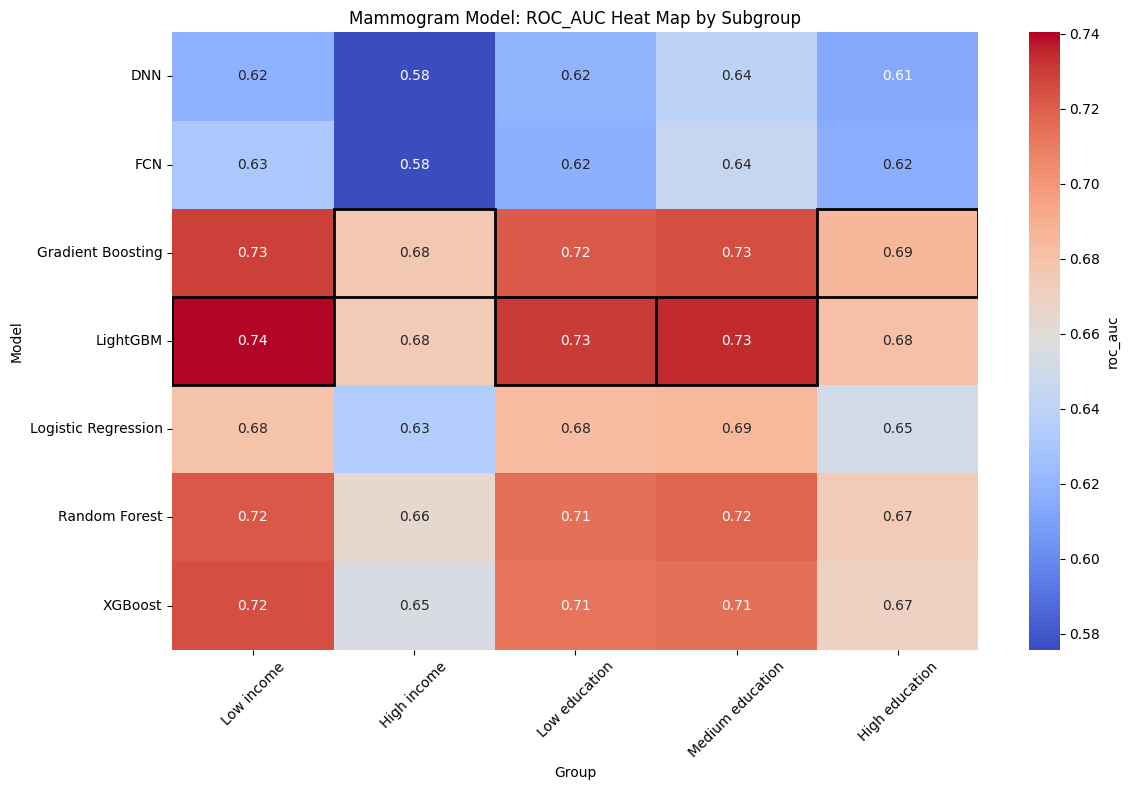

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假設 results_df 是 cross_validation_models 的輸出結果
# 其中包含欄位 ['group', 'roc_auc', 'model']
def plot_heatmap_with_best(results_df, value_col='roc_auc', title='Model Accuracy Heat Map'):
    # 創建透視表
    heatmap_data = results_df.pivot_table(index='model', columns='group', values=value_col, aggfunc='mean')

    # 找出每個 group 中的最大值位置
    best_indices = heatmap_data.idxmax()  # 找到每列 (group) 最大值對應的模型
    
    # 繪製 Heat Map
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': value_col})
    
    # 標記每個子群組中的最佳模型 (畫框)
    for col_index, (group, model) in enumerate(best_indices.items()):
        row_index = heatmap_data.index.get_loc(model)  # 獲取模型的行索引
        ax.add_patch(plt.Rectangle((col_index, row_index), 1, 1, fill=False, edgecolor='black', lw=2))

    # 添加標題和標籤
    plt.title(title)
    plt.ylabel('Model')
    plt.xlabel('Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 繪製 Heat Map (使用示例資料)
plot_heatmap_with_best(results_df, value_col='roc_auc', title='Mammogram Model: ROC_AUC Heat Map by Subgroup')